# Implementing the perceptron with NumPy

<img src="files/mcculloch_pitts.png" width="300" height="300">

As described in my article on Medium, the perceptron neuron architecture is very similar to the McCulloch and Pitts neurons. It offers more flexibility in terms of weights (they can be real numbers) and the weights are trainable in order to optimize the performance. 
Let's divide the perceptron's operation mode in two steps:
- The feedforward mechanism
- The training phase. 

### The feedforward mechanism

We call feedforward to the mechanism of retrieving an output from a set of inputs and weights. The equation that we use to get a predicted output ($y$) is the following:
<br>
<br>

$$
\large
y = \sigma(W \cdot x + b)
$$

<br>
<br>
<br>

where $y$ is a vector of values that represent the output, $\sigma$ is the threshold function $W$ is the matrix of weights, $x$ is a vector that represents an input and $b$ is a vector of biases. The expanded version of this equation is the following:
<br>
<br>

$$
\large
\begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{n}
\end{bmatrix}
=
\sigma(
\begin{bmatrix}
    w_{11}       & w_{12} & \dots  & w_{1m} \\
    w_{21}       & w_{22} & \dots  & w_{2m} \\
    \vdots       & \vdots & \ddots & \vdots \\
    w_{n1}       & w_{n2} & \dots  & w_{nm}
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_{1}\\
    x_{2}\\
    \vdots\\
    x_{m}
\end{bmatrix}
+
\begin{bmatrix}
    b_{1}\\
    b_{2}\\
    \vdots\\
    b_{n}
\end{bmatrix}
)
$$

<br>
<br>
<br>

This equation can be transformed in such a way that the biases are incorporated into the weights matrix. And in that case we have the following equation:
<br>
<br>
$$
\large
\begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{n}
\end{bmatrix}
=
\sigma(
\begin{bmatrix}
    w_{11}       & w_{12} & \dots  & w_{1m} & b_{1}\\
    w_{21}       & w_{22} & \dots  & w_{2m} & b_{2}\\
    \vdots       & \vdots & \vdots & \ddots & \vdots \\
    w_{n1}       & w_{n2} & \dots  & w_{nm} & b_{n}
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_{1}\\
    x_{2}\\
    \vdots\\
    x_{m}\\
    1
\end{bmatrix}
)
$$
<br>
<br>
So we are going to implement two functions now: one to implement $\sigma$ and another one to implement the feedforward mechanism described in the last equation.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv

In [2]:
def activation(z):
    '''z is a vector (numpy array) (N x 1)'''
    return np.where(z>0, 1, 0)

def feed_forward(W, x):
    '''
    W is a matrix (numpy array) (N x M+1)
    x is a vector (numpy array) (M+1 x 1)
    it returns an (N x 1) array
    '''
    return activation(np.dot(W, x))

Let's try to test this by trying the end-to-end example on my first article on Medium. Please note that in that example there is no bias node so I'll try to simulate that situation by adding a bias node with weight zero to give the same effect

In [3]:
# M = 3
# N = 1

x = [[2], [-0.75], [2], [1]]
W = [[-1, -1, 1, 0]]
print("z = ", np.dot(W, x)) # Just to get a sense of what happens inside the feedforward mechanism
print("y = ", feed_forward(W, x))

z =  [[0.75]]
y =  [[1]]


Good, the outputs look the same! Let's learn how to train a perceptron network

## Training a perceptron

In [4]:
# Online training
def train(W, inputs, targets, epochs, lr):
    '''
    W is a matrix (numpy array) (N x M+1)
    inputs is an array of several x's
    targets is an array of several expected outputs (t)
    epochs is an integer that represents the number of epochs a network is trained
    lr is the a float that represents the learning rate
    it returns an (N x M+1) array
    '''
    for epoch in range(epochs):
        for x, t in zip(inputs, targets):
            x = np.concatenate((x, [[1]]), axis=0)
            y = feed_forward(W, x)
            errors = np.subtract(y, t)
            deltas = lr * np.transpose(np.dot(errors, np.transpose(x)))
            W = np.subtract(W, np.transpose(deltas))
    return W

In [5]:
def is_output_correct(y, t):
    ''' compares two (N x 1) arrays'''
    return np.array_equal(y, t)

def get_accuracy(examples, targets, W):
    right_answers = 0
    for x, t in zip(examples, targets):
        x = np.concatenate((x, [[1]]), axis=0)
        y = feed_forward(W, x)
        if is_output_correct(y, t):
            right_answers += 1
    return right_answers/examples.shape[0]

## Examples of perceptrons learning

In [6]:
def plot_decision_boundary():
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.scatter(list(map(lambda x: x[0][0], dataset)),
                list(map(lambda x: x[1][0], dataset)),
                c=colors,
                s=50)
    x_decision_hyperplane = list(range(-1,3))
    b = W[-1][-1]
    y_decision_hyperplane = list(map(lambda x: (-(W[0][0]/W[0][1])*x -(b/W[0][1])), x_decision_hyperplane))
    print("--------------")
    print("Predictions: ")
    print("Example (x) | Target (t) | Predicted (y)")
    for x, t in zip(dataset, targets):
        x = np.concatenate((x, [[1]]), axis=0)
        print("x: ", x, "t: ", t, "y: ", feed_forward(W,x))

    plt.plot(x_decision_hyperplane, y_decision_hyperplane, '-.')
    plt.show()

### Teaching a perceptron to perform the AND operation

In [7]:
input_neurons = 2
output_neurons = 1

Trained network weights:  [[ 0.17  0.14 -0.18]]
Accuracy:  1.0
--------------
Predictions: 
Example (x) | Target (t) | Predicted (y)
x:  [[0]
 [0]
 [1]] t:  [[0]] y:  [[0]]
x:  [[0]
 [1]
 [1]] t:  [[0]] y:  [[0]]
x:  [[1]
 [0]
 [1]] t:  [[0]] y:  [[0]]
x:  [[1]
 [1]
 [1]] t:  [[1]] y:  [[1]]


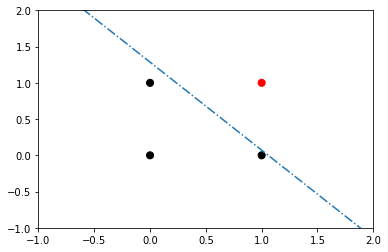

In [8]:
dataset = np.array([[[0], [0]], [[0], [1]], [[1], [0]], [[1], [1]]])
targets = np.array([[[0]], [[0]], [[0]], [[1]]])
colors = ['black', 'black', 'black','red']

W = [[-0.08, -0.11, 0.07]]
W = train(W, dataset, targets, epochs=5, lr=0.25)
print("Trained network weights: ", W)
print("Accuracy: ", get_accuracy(dataset, targets, W))
plot_decision_boundary()

### Teaching a perceptron to perform the OR operation

In [9]:
input_neurons = 2
output_neurons = 1

Trained network weights:  [[-0.511 -0.3    0.57 ]]
Accuracy:  1.0
--------------
Predictions: 
Example (x) | Target (t) | Predicted (y)
x:  [[0]
 [0]
 [1]] t:  [[1]] y:  [[1]]
x:  [[0]
 [1]
 [1]] t:  [[1]] y:  [[1]]
x:  [[1]
 [0]
 [1]] t:  [[1]] y:  [[1]]
x:  [[1]
 [1]
 [1]] t:  [[0]] y:  [[0]]


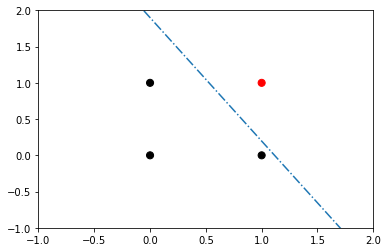

In [10]:
dataset = np.array([[[0], [0]], [[0], [1]], [[1], [0]], [[1], [1]]])
targets = np.array([[[1]], [[1]], [[1]], [[0]]])
colors = ['black', 'black', 'black','red']

W = [[-0.011, -0.05, 0.07]]
W = train(W, dataset, targets, epochs=10, lr=0.25)
print("Trained network weights: ", W)
print("Accuracy: ", get_accuracy(dataset, targets, W))
plot_decision_boundary()

### Teach a perceptron to perform the NOT operation

In [14]:
def plot_decision_boundary_single_input():
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.scatter(list(map(lambda x: 0, dataset)),
                list(map(lambda x: x[0][0], dataset)),
                c=colors,
                s=50)
    x_decision_hyperplane = list(range(-1,3))
    b = W[-1][-1]
    y_decision_hyperplane = list(map(lambda x: -(b/W[0][0]), x_decision_hyperplane))
    print("--------------")
    print("Predictions: ")
    print("Example (x) | Target (t) | Predicted (y)")
    for x, t in zip(dataset, targets):
        x = np.concatenate((x, [[1]]), axis=0)
        print(x, t, feed_forward(W,x))

    plt.plot(x_decision_hyperplane, y_decision_hyperplane, '-.')
    plt.show()

In [15]:
input_neurons = 1
output_neurons = 1

Trained network weights:  [[-0.45  0.2 ]]
Accuracy:  1.0
--------------
Predictions: 
Example (x) | Target (t) | Predicted (y)
[[1]
 [1]] [[0]] [[0]]
[[0]
 [1]] [[1]] [[1]]


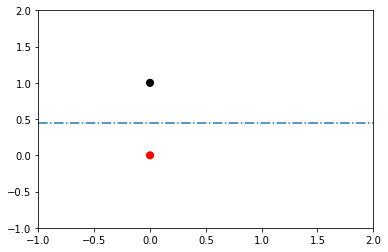

In [16]:
dataset = np.array([[[1]], [[0]]])
targets = np.array([[[0]], [[1]]])
colors = ['black', 'red']

W = np.array([[0.8, 0.2]])
W = train(W, dataset, targets, epochs=5, lr=0.25)
print("Trained network weights: ", W)
print("Accuracy: ", get_accuracy(dataset, targets, W))
plot_decision_boundary_single_input()

## Offline training

In [17]:
# Online training
def train(W, inputs, targets, epochs, lr):
    '''
    W is a matrix (numpy array) (N x M+1)
    inputs is an array of several x's
    targets is an array of several expected outputs (t)
    epochs is an integer that represents the number of epochs a network is trained
    lr is the a float that represents the learning rate
    it returns an (N x M+1) array
    '''
    print(pinv(inputs).shape)
    return pinv(inputs)

In [22]:
dataset = np.array([[[0], [0]], [[0], [1]], [[1], [0]], [[1], [1]]])
targets = np.array([[[0]], [[0]], [[0]], [[1]]])
colors = ['black', 'black', 'black','red']

W = [[-0.08, -0.11, 0.07]]
W = train(W, dataset, targets, epochs=5, lr=0.25)
print("Trained network weights: ", W)
print("Accuracy: ", get_accuracy(dataset, targets, W))
plot_decision_boundary()

(4, 1, 2)
Trained network weights:  [[[0.  0. ]]

 [[0.  1. ]]

 [[1.  0. ]]

 [[0.5 0.5]]]


ValueError: shapes (4,1,2) and (3,1) not aligned: 2 (dim 2) != 3 (dim 0)